## Import and download necessary Libraries

In [ ]:
from bs4 import BeautifulSoup
import requests
from warnings import warn
from time import sleep
import re
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob

## SCRAP MOVIES'INFORMATION

In [ ]:
url="https://www.imdb.com/search/title/?&genres=sci_fi&explore=title_type,genres"
r = requests.get(url)
r.url

'https://www.imdb.com/search/title/?&genres=sci_fi&explore=title_type,genres'

In [ ]:
r.json

<bound method Response.json of <Response [200]>>

In [ ]:
content = BeautifulSoup(r.text, 'html.parser')


In [ ]:
movies = []
years = []
genre = []
runtime_min = []
imdb_ratings = []
metascores = []
rating=[]
link=[]
review=[]

In [ ]:
movie_containers = content.find_all('div', class_ = 'lister-item mode-advanced')

In [ ]:
for container in movie_containers:

       #conditional for all with metascore
       if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
           title = container.h3.a.text
           movies.append(title)

           genre.append(container.find("span", class_="genre").text.rstrip().replace("\n","").split(","))

           if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:

             #year released
             year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text.replace("(","").replace(")","").replace("I","") # remove the parentheses around the year and make it an integer
             years.append(year)

           else:
             years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

           if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
             t = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
             runtime_min.append(t)

           else:
             runtime_min.append(None)

           if float(container.strong.text) is not None:

             #IMDB ratings
             imdb = float(container.strong.text) # non-standardized variable
             imdb_ratings.append(imdb)

           else:
             imdb_ratings.append(None)

           if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
             m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
             metascores.append(m_score)

           else:
             metascores.append(None)

           if container.p.find('span', class_ = 'certificate') is not None:

             #rating
             ratings = container.p.find('span', class_= 'certificate').text
             rating.append(ratings)

           else:
             rating.append("")


           #links
           if container.find('h3',class_="lister-item-header" ) is not None :
              links=container.find_all('h3',class_="lister-item-header" )
              for tag in links:
                  l='https://www.imdb.com/' + tag.find('a')['href']
                  link.append(l)




In [ ]:
sci_fi_df = pd.DataFrame({'movie': movies,
                      'year': years,
                       'rating': rating ,
                        'genre': genre ,
                      'runtime_min': runtime_min,
                      'imdb': imdb_ratings,
                      'metascore': metascores,
                      'movie_link':link}
                      )

In [ ]:
sci_fi_df

,movie,year,rating,genre,runtime_min,imdb,metascore,movie_link
0,Black Panther: Wakanda Forever,2022,PG-13,"[Action, Adventure, Drama]",161,7.3,67,https://www.imdb.com//title/tt9114286/
1,Black Adam,2022,PG-13,"[Action, Adventure, Fantasy]",125,6.9,41,https://www.imdb.com//title/tt6443346/
2,Black Panther,2018,PG-13,"[Action, Adventure, Sci-Fi]",134,7.3,88,https://www.imdb.com//title/tt1825683/
3,Everything Everywhere All at Once,2022,R,"[Action, Adventure, Comedy]",139,8.1,81,https://www.imdb.com//title/tt6710474/
4,Nope,2022,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,https://www.imdb.com//title/tt10954984/
5,Thor: Love and Thunder,2022,PG-13,"[Action, Adventure, Comedy]",118,6.3,57,https://www.imdb.com//title/tt10648342/
6,Avatar,2009,PG-13,"[Action, Adventure, Fantasy]",162,7.8,83,https://www.imdb.com//title/tt0499549/
7,Morbius,2022,PG-13,"[Action, Adventure, Horror]",104,5.2,35,https://www.imdb.com//title/tt5108870/
8,Interstellar,2014,PG-13,"[Adventure, Drama, Sci-Fi]",169,8.6,74,https://www.imdb.com//title/tt0816692/
9,Oblivion,2013,PG-13,"[Action, Adventure, Sci-Fi]",124,7.0,54,https://www.imdb.com//title/tt1483013/


In [ ]:
sci_fi_df.to_csv('IMDbRating.csv', index=False, encoding='utf-8')

In [ ]:
sci_fi_df.dtypes

movie           object
year            object
rating          object
genre           object
runtime_min      int64
imdb           float64
metascore        int64
movie_link      object
dtype: object

In [ ]:
sci_fi_df['year'] = pd.to_datetime(sci_fi_df['year'])

In [ ]:
sci_fi_df.dtypes

movie                  object
year           datetime64[ns]
rating                 object
genre                  object
runtime_min             int64
imdb                  float64
metascore               int64
movie_link             object
dtype: object

In [ ]:
link

['https://www.imdb.com//title/tt9114286/',
 'https://www.imdb.com//title/tt6443346/',
 'https://www.imdb.com//title/tt1825683/',
 'https://www.imdb.com//title/tt6710474/',
 'https://www.imdb.com//title/tt10954984/',
 'https://www.imdb.com//title/tt10648342/',
 'https://www.imdb.com//title/tt0499549/',
 'https://www.imdb.com//title/tt5108870/',
 'https://www.imdb.com//title/tt0816692/',
 'https://www.imdb.com//title/tt1483013/',
 'https://www.imdb.com//title/tt10872600/',
 'https://www.imdb.com//title/tt14549466/',
 'https://www.imdb.com//title/tt3748528/',
 'https://www.imdb.com//title/tt1160419/',
 'https://www.imdb.com//title/tt8041270/',
 'https://www.imdb.com//title/tt0434409/',
 'https://www.imdb.com//title/tt4154796/',
 'https://www.imdb.com//title/tt11866324/',
 'https://www.imdb.com//title/tt0088763/']

C:\Users\Chiraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


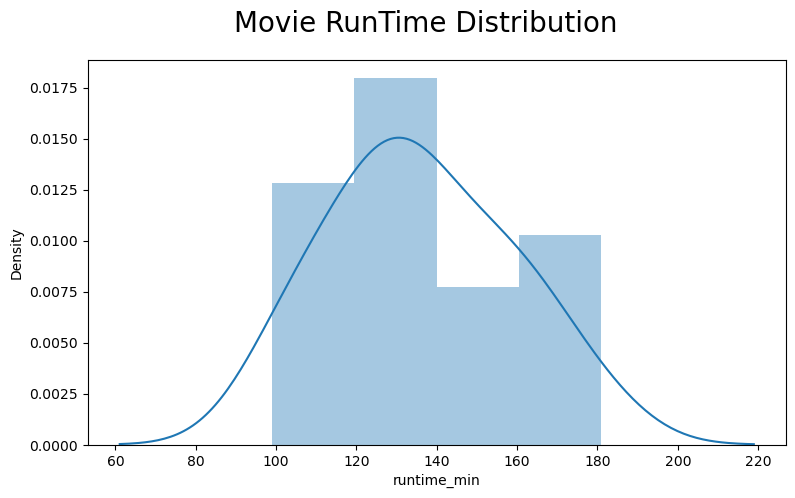

In [ ]:
# Runtime histogram/density plot
plt.figure(figsize=[9,5])
run = sns.distplot(sci_fi_df['runtime_min'])
plt.suptitle("Movie RunTime Distribution", fontsize=20)
plt.show()

<AxesSubplot:>

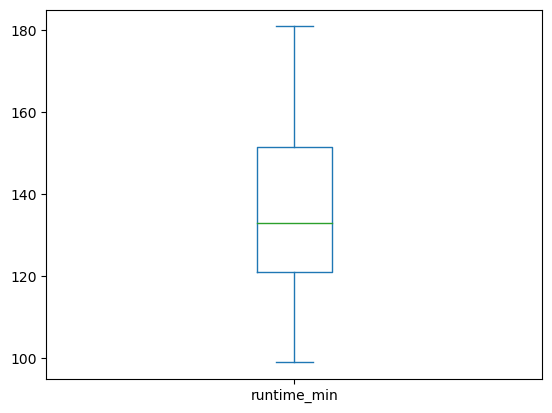

In [ ]:
# use a box plot to display that same data
sci_fi_df['runtime_min'].plot(kind='box')


Text(0, 0.5, 'Title Count')

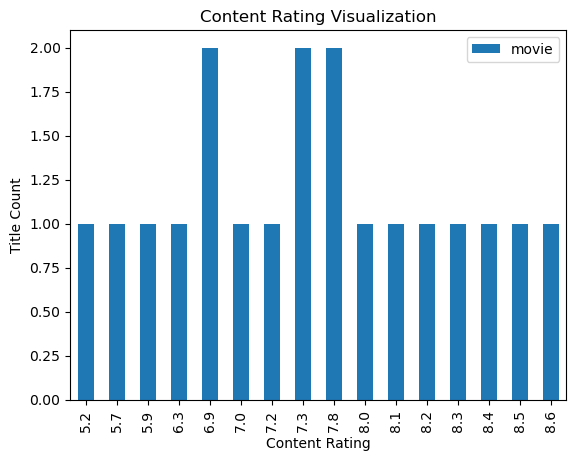

In [ ]:
sci_fi_df[['imdb','movie']].groupby('imdb').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

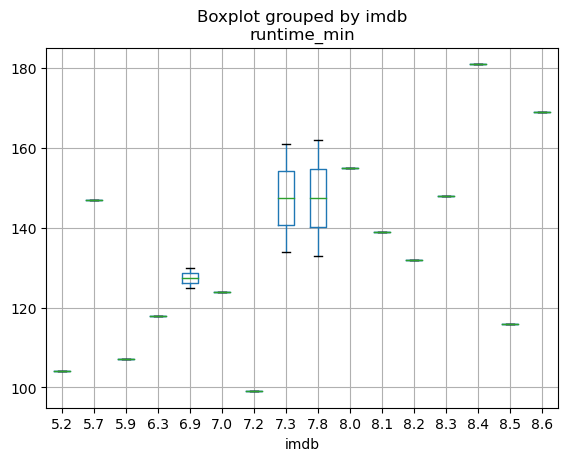

In [ ]:
# use a visualization to detect whether there is a relationship between duration and star rating
sci_fi_df.boxplot(column='runtime_min', by='imdb');

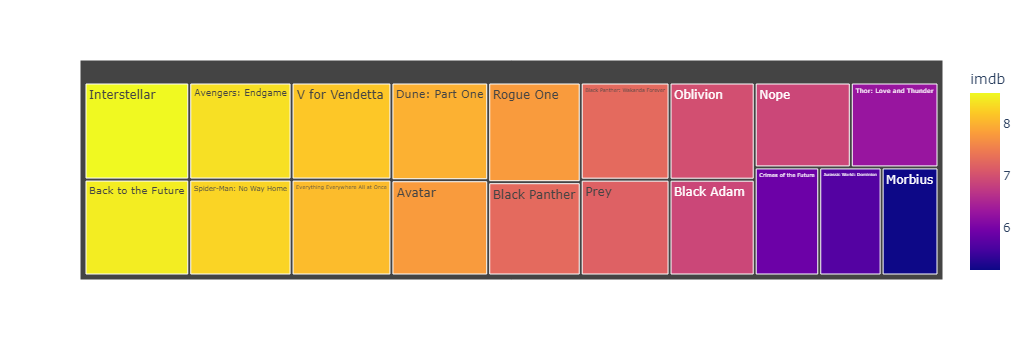

In [ ]:
import plotly.express as px
fig =px.treemap(
    sci_fi_df,
    path=['movie'],
    values='imdb',
    color='imdb')
fig.show()

[Text(0.5, 1.0, 'Cout of film depends on year release')]

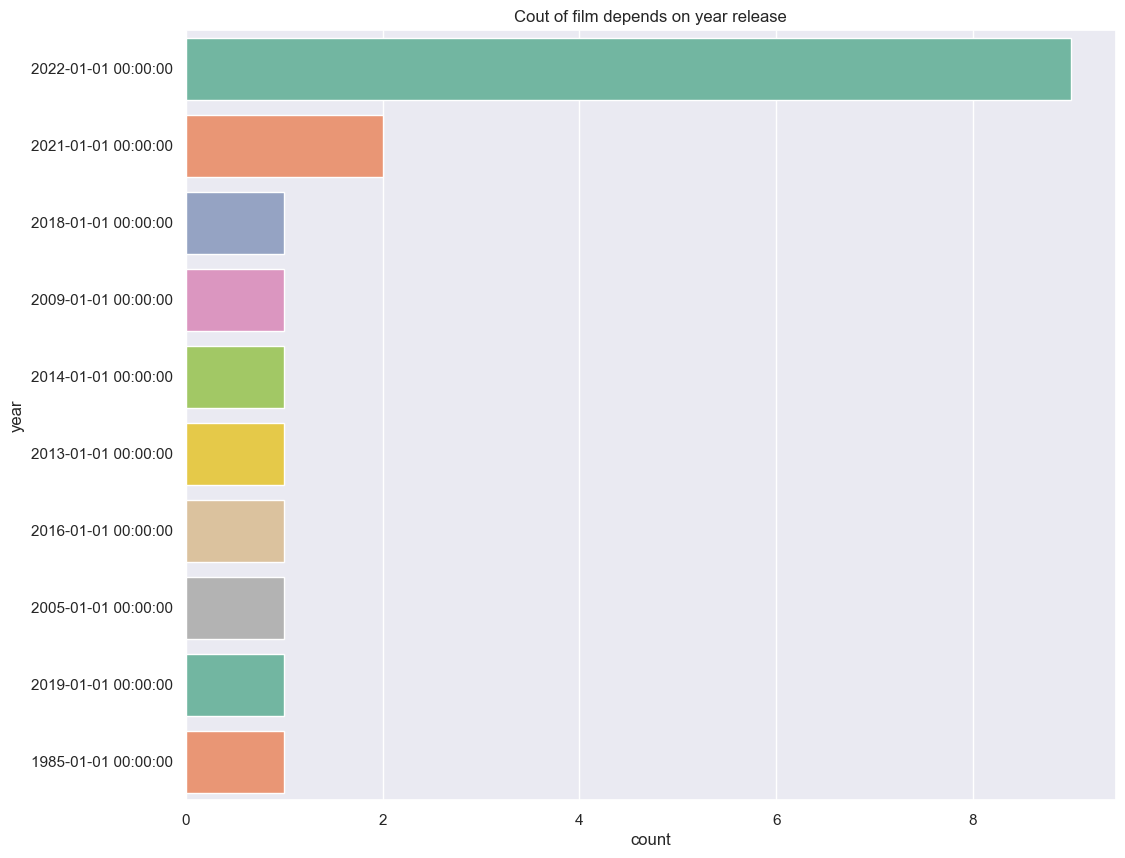

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=sci_fi_df, palette="Set2", order=sci_fi_df['year'].value_counts().index[0:15])
ax.set(title='Cout of film depends on year release')

## SCRAP REVIEWS



In [ ]:
#function to get the url to scrap review
def get_review_link (movie_url) :
    r = requests.get(movie_url)
    r.url
    r.json
    content = BeautifulSoup(r.text, 'html.parser')
    link=[]
    review_containers = content.find_all('div', class_="ipc-title__wrapper")
    for tag in review_containers:
        l='https://www.imdb.com/' + tag.find('a')['href']
        link.append(l)
    return link[5]

In [ ]:
#function that return the reviews
def get_reviews(review_link) :
    r = requests.get(review_link)
    r.url
    r.json
    content = BeautifulSoup(r.text, 'html.parser')
    review= []
    review_containers = content.find_all('div', class_="text show-more__control")
    for container in review_containers:
        r = container.text
        review.append(r)
    df = pd.DataFrame({'review': review})
    return df

In [ ]:
review=[]

In [ ]:
sci_fi_df.shape

(19, 8)

In [ ]:
for i in range(len(sci_fi_df)):
    movie_url= sci_fi_df.iloc[i,7]
    review_url= get_review_link (movie_url)
    review.append(review_url)
sci_fi_df["Review_links"]=review

In [ ]:
sci_fi_df

,movie,year,rating,genre,runtime_min,imdb,metascore,movie_link,Review_links
0,Black Panther: Wakanda Forever,2022-01-01,PG-13,"[Action, Adventure, Drama]",161,7.3,67,https://www.imdb.com//title/tt9114286/,https://www.imdb.com//title/tt9114286/reviews?...
1,Black Adam,2022-01-01,PG-13,"[Action, Adventure, Fantasy]",125,6.9,41,https://www.imdb.com//title/tt6443346/,https://www.imdb.com//title/tt6443346/reviews?...
2,Black Panther,2018-01-01,PG-13,"[Action, Adventure, Sci-Fi]",134,7.3,88,https://www.imdb.com//title/tt1825683/,https://www.imdb.com//title/tt1825683/reviews?...
3,Everything Everywhere All at Once,2022-01-01,R,"[Action, Adventure, Comedy]",139,8.1,81,https://www.imdb.com//title/tt6710474/,https://www.imdb.com//title/tt6710474/reviews?...
4,Nope,2022-01-01,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,https://www.imdb.com//title/tt10954984/,https://www.imdb.com//title/tt10954984/reviews...
5,Thor: Love and Thunder,2022-01-01,PG-13,"[Action, Adventure, Comedy]",118,6.3,57,https://www.imdb.com//title/tt10648342/,https://www.imdb.com//title/tt10648342/reviews...
6,Avatar,2009-01-01,PG-13,"[Action, Adventure, Fantasy]",162,7.8,83,https://www.imdb.com//title/tt0499549/,https://www.imdb.com//title/tt0499549/reviews?...
7,Morbius,2022-01-01,PG-13,"[Action, Adventure, Horror]",104,5.2,35,https://www.imdb.com//title/tt5108870/,https://www.imdb.com//title/tt5108870/reviews?...
8,Interstellar,2014-01-01,PG-13,"[Adventure, Drama, Sci-Fi]",169,8.6,74,https://www.imdb.com//title/tt0816692/,https://www.imdb.com//title/tt0816692/reviews?...
9,Oblivion,2013-01-01,PG-13,"[Action, Adventure, Sci-Fi]",124,7.0,54,https://www.imdb.com//title/tt1483013/,https://www.imdb.com//title/tt1483013/reviews?...


In [ ]:
sci_fi_df.to_csv('IMDbRating2.csv', index=False, encoding='utf-8')

In [ ]:
film_to_analyse=sci_fi_df.iloc[0,8]

In [ ]:
film_to_analyse

'https://www.imdb.com//title/tt9114286/reviews?ref_=tt_urv'

In [ ]:
df=get_reviews(film_to_analyse)

In [ ]:
df

,review
0,I am conflicted with this film and with Marvel...
1,Phase 4's MCU comes to a close with Black Pant...
2,"First of all, RIP to Chadwick Boseman. They re..."
3,Black Panther was a very welcome addition to t...
4,"""Black Panther: Wakanda Forever"" is the sequel..."
5,"At this point, Marvel is getting too saturated..."
6,This film and its prequel both had exceptional...
7,I want to start by saying I haven't been the b...
8,Obviously this movie is a huge thing. Chadwick...
9,"""Wakanda Forever"" is MCU's 30-th movie and is ..."


## Analyse des sentiments

In [ ]:
def analyze_sentiment(tweet):
 analysis=TextBlob(tweet)
 if analysis.sentiment.polarity>0:
    return 'positive'
 elif analysis.sentiment.polarity==0:
    return 'neutral'
 else:
    return 'negative'

In [ ]:
df=pd.DataFrame(df)
df.columns=['review']
df['sentiment']=[str(analyze_sentiment(x)) for x in df.review]
df.sentiment.value_counts()

positive    24
negative     1
Name: sentiment, dtype: int64

In [ ]:
df

,review,sentiment
0,I am conflicted with this film and with Marvel...,positive
1,Phase 4's MCU comes to a close with Black Pant...,positive
2,"First of all, RIP to Chadwick Boseman. They re...",positive
3,Black Panther was a very welcome addition to t...,positive
4,"""Black Panther: Wakanda Forever"" is the sequel...",positive
5,"At this point, Marvel is getting too saturated...",positive
6,This film and its prequel both had exceptional...,positive
7,I want to start by saying I haven't been the b...,positive
8,Obviously this movie is a huge thing. Chadwick...,positive
9,"""Wakanda Forever"" is MCU's 30-th movie and is ...",positive


## Some Visualisation

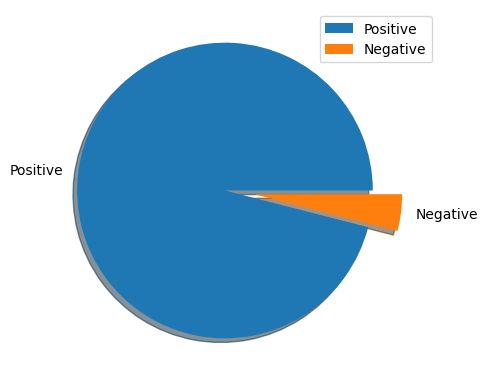

In [ ]:
y = df.sentiment.value_counts()
mylabels = ["Positive","Negative"]
myexplode=[0.2,0]
plt.pie(y, labels = mylabels, explode = myexplode,shadow=True)
plt.legend()
plt.show()

In [ ]:
def show_cloud(input) :
    # Generate the word cloud from the input string
    cloud_test = WordCloud(background_color="white").generate(test)
    # Create a figure of the generated cloud
    plt.imshow(cloud_test, interpolation='bilinear')
    plt.axis('off')
    # Display the figure
    plt.show()

In [ ]:
test=df.iloc[0,0]

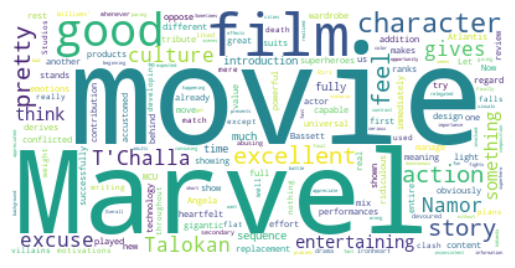

In [ ]:
show_cloud(test)